In [1]:
import galarp as grp
from galarp import InterpolatedWind, InterpolatedDensity

grp.pyplot_style()
cmap = grp.lavender_cmap(step_1=50)

import numpy as np

from astropy import units as u
from astropy.table import Table

from gala.units import galactic
from scipy.interpolate import interp1d

from matplotlib import pyplot as plt

from scipy import stats
from scipy.interpolate import interp1d

from astropy.modeling.models import Gaussian1D, custom_model
from astropy.modeling.fitting import LevMarLSQFitter

In [2]:
orbits = grp.OrbitContainer.load("temp/orbits_JZ_dup.grp")

print(orbits)

In [3]:
times, rstrips = grp.rstrip(orbits)

r_final = grp.final_rstrip(orbits)


In [4]:
grp.rstrip_plot(orbits, title="Stripping Radius", rstrip_frac=0.8, zmax=2 * u.kpc, rmax=20 * u.kpc, 
            outname="figures/stripping_radius_JZ.pdf", close_plot=True)

/Users/hsouchereau/galarp/galarp/postprocessing/plotting/general_plots.py:337: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


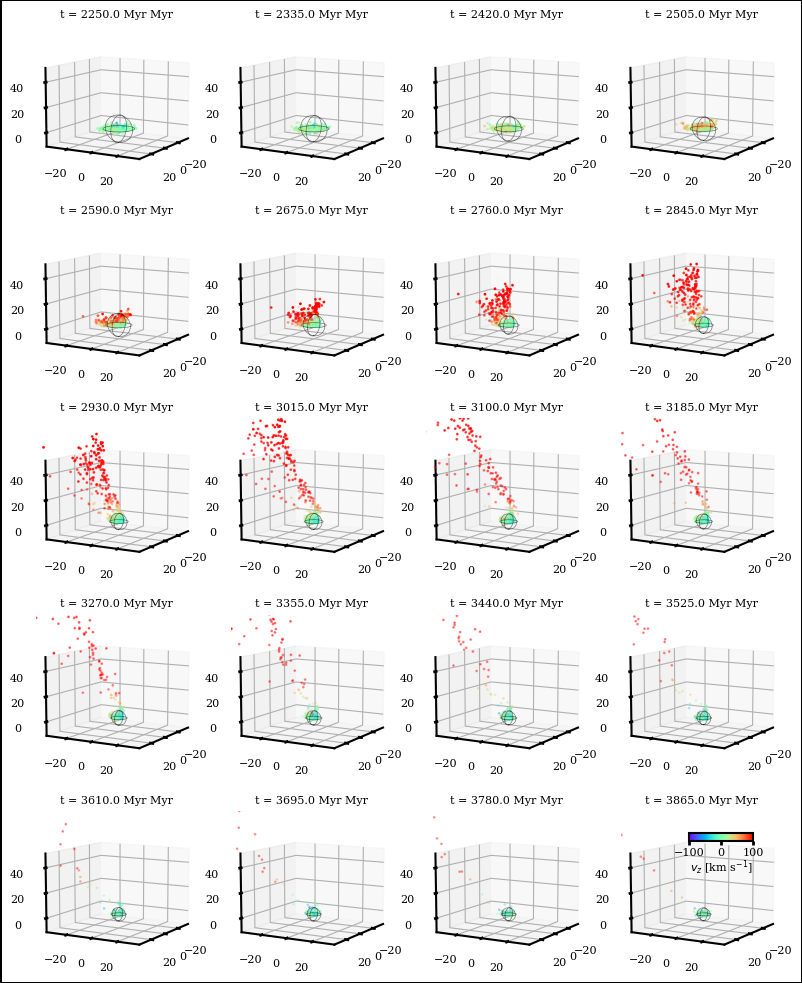

In [5]:
grp.pyplot_3D_plot(orbits, nrows=5, ncols=4, tmin=450, tmax=800, cmap="rainbow", rmax=35, outname="figures/orbits_3D_JZ.pdf", dpi=50)


In [6]:
x,y,z, *_ = grp.get_orbit_data(orbits.data)
x,y,z = x.T, y.T, z.T


In [7]:
def calculate_rstrip(xyz, rmax=20, zmax=2, frac=0.8):
    x,y,z = xyz
    r = np.sqrt(x**2 + y**2 + z**2)
    this_r_cut = r[np.abs(z) < zmax]
    this_r_cut = this_r_cut[this_r_cut < rmax]
    
    try:
        cdf = stats.ecdf(this_r_cut)
        cdf_xs, cdf_vals = cdf.cdf.quantiles, cdf.cdf.probabilities
        return cdf_xs[np.argmin(np.abs(cdf_vals - frac))]
    except:
        return 0

this_x, this_y, this_z = x[0], y[0], z[0]

#%timeit 
calculate_rstrip([this_x, this_y, this_z])

5.716354371064774

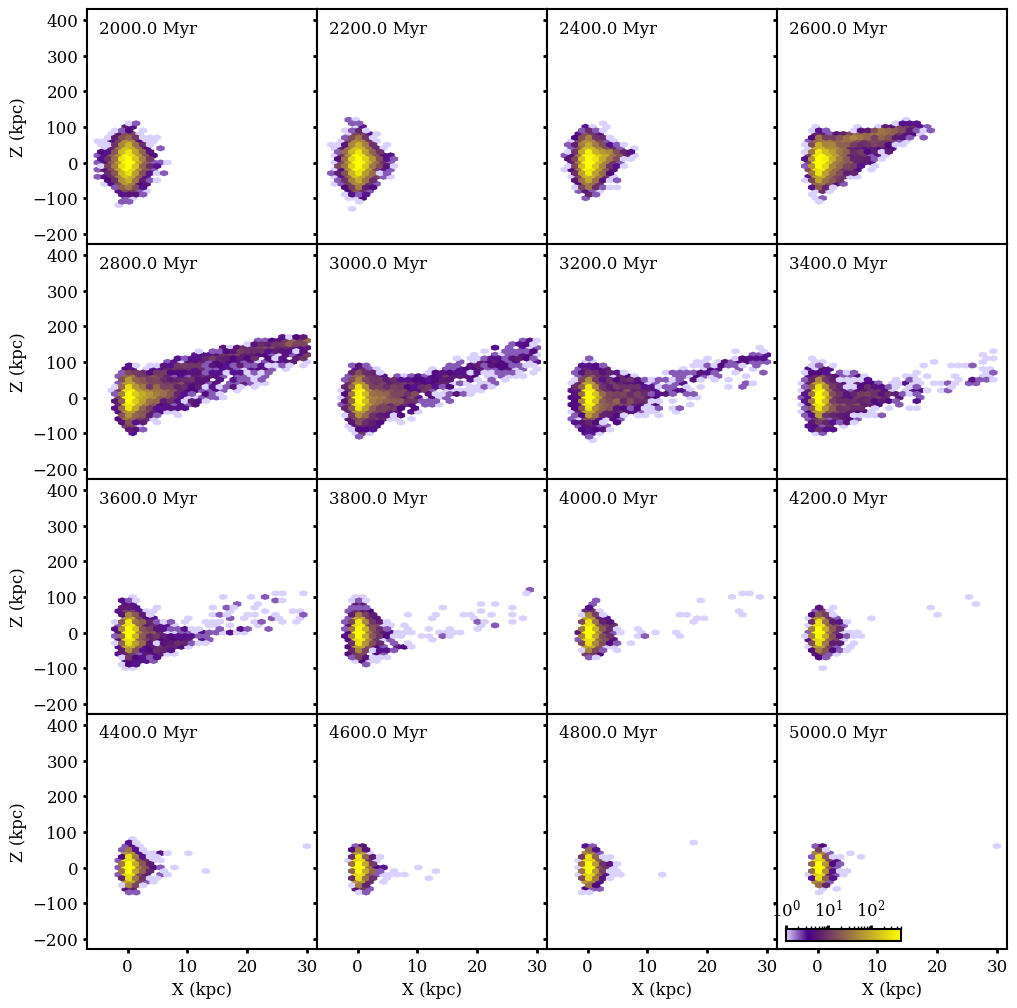

In [8]:
times = np.linspace(400, len(orbits.data.t) - 1000, 4 * 4).astype(int)

grp.density_matrix(orbits, cmap=cmap, x_ind=2, y_ind=5, ylabel='Z (kpc)', times=times,
                   yextent=(-200, 400), xextent=(-5, 30), outname="figures/density_matrix_JZ_dup_xz.png")

In [9]:
print((1 / orbits.metadata["R_CLOUD"] **3 * orbits.metadata["M_CLOUD"]).to(u.g / u.cm**3))
print()


5.414324258597863e-23 g / cm3



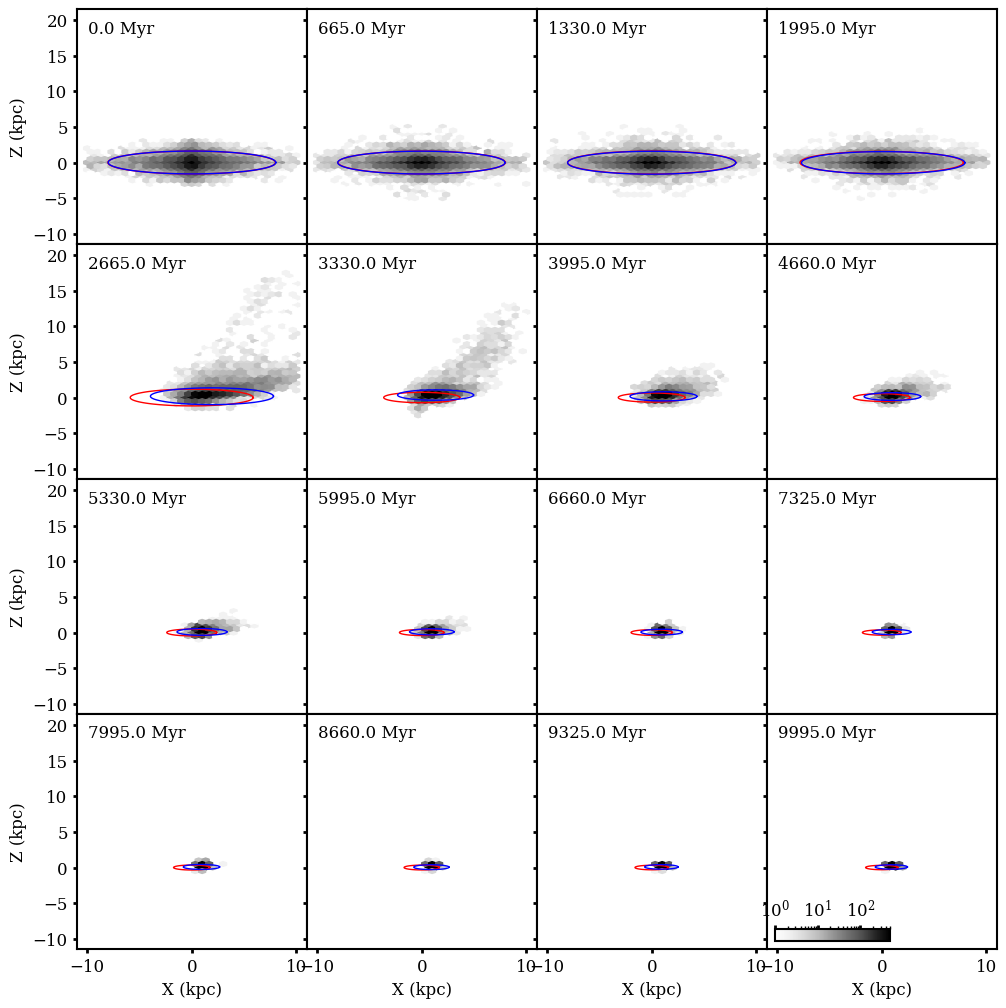

In [10]:

grp.shadow_check(orbits, xextent=(-10, 10), yextent=(-10,20), cmap="Greys", outname="figures/shadow_check.pdf")